# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather"

# Set units of measurements to metric 
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Parameters
    params = {
        'q':city,
        'units':units,
        'appid':weather_api_key
    }
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    data = requests.get(base_url, params=params).json()

    try:
        # Parse the JSON and retrieve data
        city_weather = data['main']['temp']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data['coord']['lat']
        city_lng = data['coord']['lon']
        city_max_temp = data['main']['temp_max']
        city_humidity = data['main']['humidity']
        city_clouds = data['clouds']['all']
        city_wind = data['wind']['speed']
        city_country = data['sys']['country']
        city_date = time.ctime(data['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
            
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | rio grande
Processing Record 3 of Set 1 | syktyvkar
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | jadder cemetery
City not found. Skipping...
Processing Record 7 of Set 1 | utrik
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | pampierstad
Processing Record 10 of Set 1 | mili
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | holualoa
Processing Record 13 of Set 1 | ambodifotatra
Processing Record 14 of Set 1 | luanda
Processing Record 15 of Set 1 | kenai
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | al bawiti
Processing Record 19 of Set 1 | iskateley
Processing Record 20 of Set 1 | kroya
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 |

In [11]:
# pretty print the city_data list
pprint(city_data)

[{'City': 'adamstown',
  'Cloudiness': 100,
  'Country': 'PN',
  'Date': 'Mon Nov 13 06:55:59 2023',
  'Humidity': 85,
  'Lat': -25.066,
  'Lng': -130.1015,
  'Max Temp': 22.5,
  'Wind Speed': 8.14},
 {'City': 'rio grande',
  'Cloudiness': 100,
  'Country': 'BR',
  'Date': 'Mon Nov 13 06:56:00 2023',
  'Humidity': 97,
  'Lat': -32.035,
  'Lng': -52.0986,
  'Max Temp': 19.06,
  'Wind Speed': 3.39},
 {'City': 'syktyvkar',
  'Cloudiness': 100,
  'Country': 'RU',
  'Date': 'Mon Nov 13 06:56:01 2023',
  'Humidity': 100,
  'Lat': 61.6764,
  'Lng': 50.8099,
  'Max Temp': -0.05,
  'Wind Speed': 3.13},
 {'City': 'port-aux-francais',
  'Cloudiness': 100,
  'Country': 'TF',
  'Date': 'Mon Nov 13 06:56:02 2023',
  'Humidity': 98,
  'Lat': -49.35,
  'Lng': 70.2167,
  'Max Temp': 5.74,
  'Wind Speed': 9.07},
 {'City': 'albany',
  'Cloudiness': 6,
  'Country': 'US',
  'Date': 'Mon Nov 13 06:55:18 2023',
  'Humidity': 88,
  'Lat': 42.6001,
  'Lng': -73.9662,
  'Max Temp': -4.55,
  'Wind Speed': 0.89},

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,22.50,85,100,8.14,PN,Mon Nov 13 06:55:59 2023
1,rio grande,-32.0350,-52.0986,19.06,97,100,3.39,BR,Mon Nov 13 06:56:00 2023
2,syktyvkar,61.6764,50.8099,-0.05,100,100,3.13,RU,Mon Nov 13 06:56:01 2023
3,port-aux-francais,-49.3500,70.2167,5.74,98,100,9.07,TF,Mon Nov 13 06:56:02 2023
4,albany,42.6001,-73.9662,-4.55,88,6,0.89,US,Mon Nov 13 06:55:18 2023


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.50,85,100,8.14,PN,Mon Nov 13 06:55:59 2023
1,rio grande,-32.0350,-52.0986,19.06,97,100,3.39,BR,Mon Nov 13 06:56:00 2023
2,syktyvkar,61.6764,50.8099,-0.05,100,100,3.13,RU,Mon Nov 13 06:56:01 2023
3,port-aux-francais,-49.3500,70.2167,5.74,98,100,9.07,TF,Mon Nov 13 06:56:02 2023
4,albany,42.6001,-73.9662,-4.55,88,6,0.89,US,Mon Nov 13 06:55:18 2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [72]:
# A function that returns the scatter plots for x vs. y
def weather_plot(x, y):
    
    # Build scatter plot for x vs. y
    city_data_df.plot(x, y, kind='scatter', s = 40, edgecolors = 'black', alpha = 0.7, grid=True)

    # Variable to hold date displayed on plot title
    date= f"({time.localtime().tm_year}-{time.localtime().tm_mon}-{time.localtime().tm_mday})"

    # Incorporate the other graph properties and save the figure
    plt.xlabel("Latitude")
    if y == "Max Temp":
        plt.ylabel("Max Temperatures (C)")
        plt.title(f"City Latitude vs. Max Temperature {date}")
        plt.savefig("output_data/Fig1.png")
    elif y == "Humidity":
        plt.ylabel("Humidity (%)")
        plt.title(f"City Latitude vs. Humidity {date}")
        plt.savefig("output_data/Fig2.png")        
    elif y == "Cloudiness":
        plt.ylabel("Cloudiness (%)")
        plt.title(f"City Latitude vs. Cloudiness {date}")
        plt.savefig("output_data/Fig3.png")        
    elif y == "Wind Speed":
        plt.ylabel("Wind Speed (m/s)")
        plt.title(f"City Latitude vs. Wind Speed {date}")
        plt.savefig("output_data/Fig4.png")
        
    # Show plot
    plt.show()

    return

#### Latitude Vs. Humidity

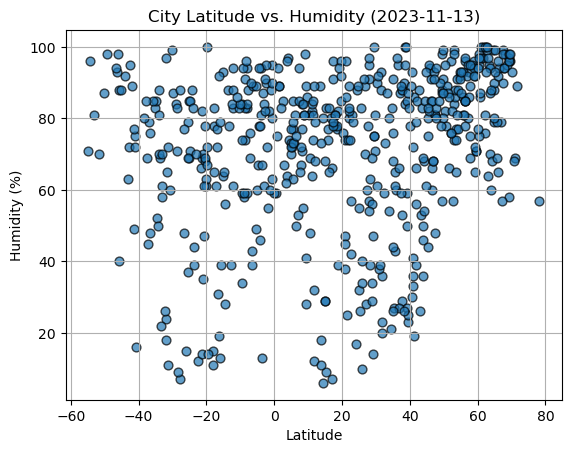

In [108]:
# Customize function to return the scatter plots for Latitude vs. Humidity
weather_plot('Lat', 'Humidity')

#### Latitude Vs. Cloudiness

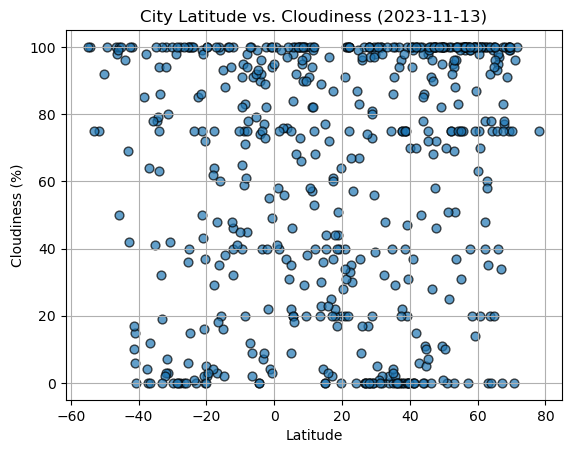

In [109]:
# Customize function to return the scatter plots for Latitude vs. Cloudiness
weather_plot('Lat', 'Cloudiness')

#### Latitude vs. Wind Speed Plot

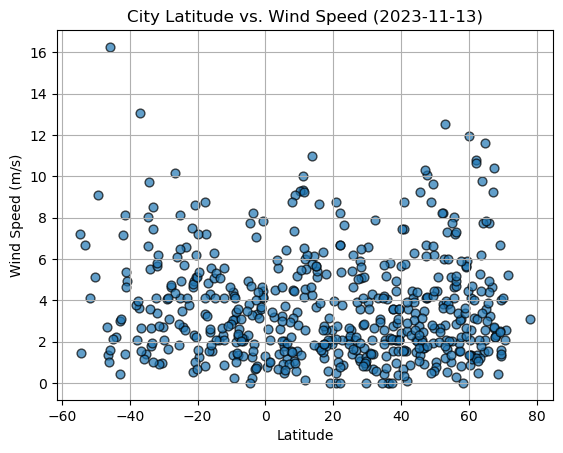

In [110]:
# Customize function to return the scatter plots for Latitude vs. Wind Speed
weather_plot('Lat', 'Wind Speed')

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [81]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,syktyvkar,61.6764,50.8099,-0.05,100,100,3.13,RU,Mon Nov 13 06:56:01 2023
4,albany,42.6001,-73.9662,-4.55,88,6,0.89,US,Mon Nov 13 06:55:18 2023
5,utrik,11.2278,169.8474,28.03,82,82,9.36,MH,Mon Nov 13 06:56:04 2023
6,iqaluit,63.7506,-68.5145,-19.06,70,20,6.17,CA,Mon Nov 13 06:56:06 2023
8,mili,6.0815,171.7350,28.55,81,100,6.41,MH,Mon Nov 13 06:56:08 2023


In [82]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.50,85,100,8.14,PN,Mon Nov 13 06:55:59 2023
1,rio grande,-32.0350,-52.0986,19.06,97,100,3.39,BR,Mon Nov 13 06:56:00 2023
3,port-aux-francais,-49.3500,70.2167,5.74,98,100,9.07,TF,Mon Nov 13 06:56:02 2023
7,pampierstad,-27.7832,24.6877,33.93,7,0,4.65,ZA,Mon Nov 13 06:56:07 2023
9,margaret river,-33.9500,115.0667,16.66,88,94,5.51,AU,Mon Nov 13 06:56:10 2023


In [141]:
# Define a function to create Linear Regression plots
def weather_linregress_plot(x, y, df):
    
    
    # Build scatter plot for x vs. y
    df.plot(x, y, kind='scatter', s = 30)

    # Calculate Linear Regression
    (slope, intercept, rvalue, pvalue, stderr)= linregress(df[x], df[y])
    
    #Print r-value
    print(f"The r-value is: {rvalue}")

    # Linear Regression formular
    regress_line = (slope * df[x] ) + intercept

    # Plot Linear Regression line and annotate the equation on the plot
    plt.plot(df[x], regress_line, color = 'red')
    
    # If statements to determine if plot is for Northern Hemisphere or Southern Hemisphere
    if len(list(df[x]))== 378:
        plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", (5, 12), fontsize = 15, color = 'red')
    elif len(list(df[x]))== 171:
        plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", (-55, 12), fontsize = 15, color = 'red')

    # Incorporate the other graph properties and save the figure
    plt.xlabel("Latitude")
    if y == "Max Temp":
        plt.ylabel("Max Temperatures (C)")
        

    elif y == "Humidity":
        plt.ylabel("Humidity (%)")
        

    elif y == "Cloudiness":
        plt.ylabel("Cloudiness (%)")
        

    elif y == "Wind Speed":
        plt.ylabel("Wind Speed (m/s)")

    # Show plot
    plt.show()

    return

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8655446957448523


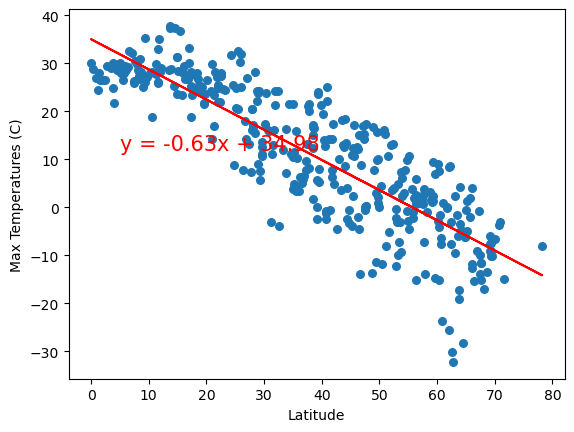

In [142]:
# Linear regression on Northern Hemisphere
weather_linregress_plot('Lat', 'Max Temp', northern_hemi_df)

The r-value is: 0.7196330335823364


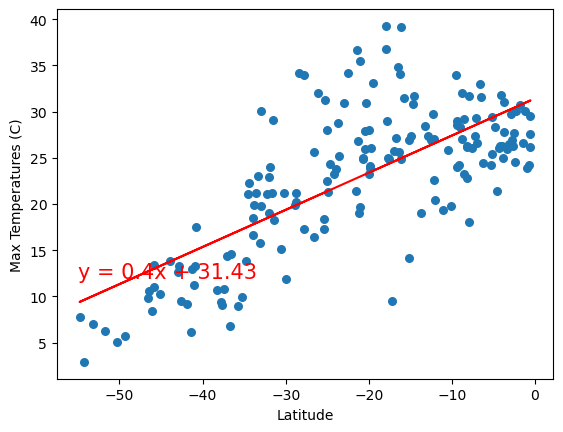

In [143]:
# Linear regression on Southern Hemisphere
weather_linregress_plot('Lat', 'Max Temp', southern_hemi_df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.29945992762800355


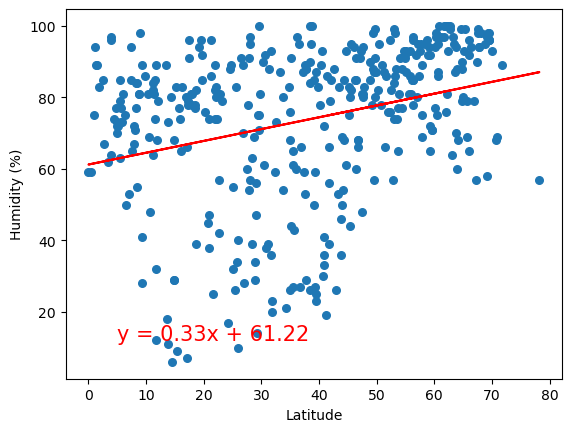

In [144]:
# Northern Hemisphere
weather_linregress_plot('Lat', 'Humidity', northern_hemi_df)

The r-value is: 0.025116741811064373


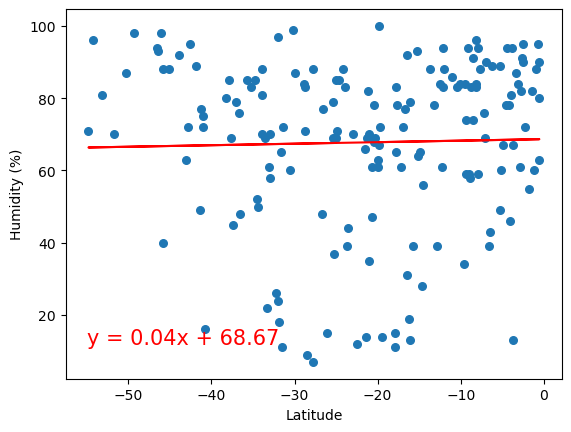

In [145]:
# Southern Hemisphere
weather_linregress_plot('Lat', 'Humidity', southern_hemi_df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.18802887072235983


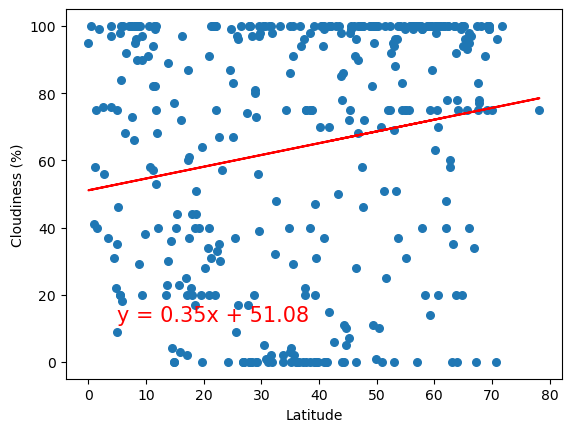

In [146]:
# Northern Hemisphere
weather_linregress_plot('Lat', 'Cloudiness', northern_hemi_df)

The r-value is: -0.022869905717118492


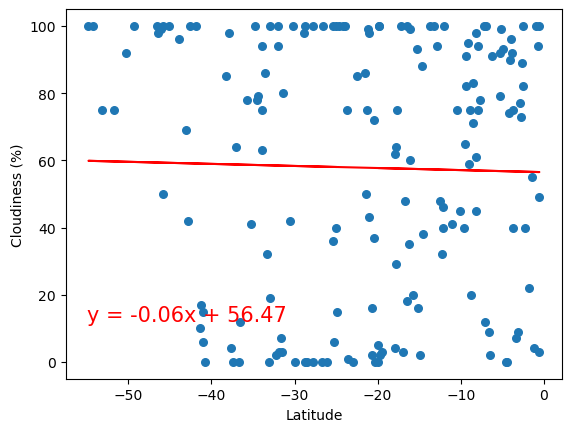

In [147]:
# Southern Hemisphere
weather_linregress_plot('Lat', 'Cloudiness', southern_hemi_df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07417509572004274


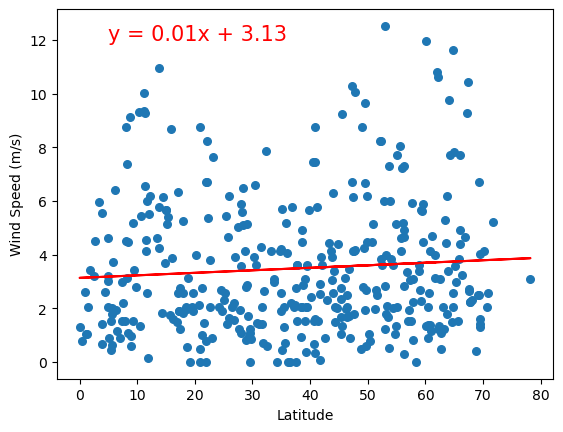

In [148]:
# Northern Hemisphere
weather_linregress_plot('Lat', 'Wind Speed', northern_hemi_df)

The r-value is: -0.1992374646018653


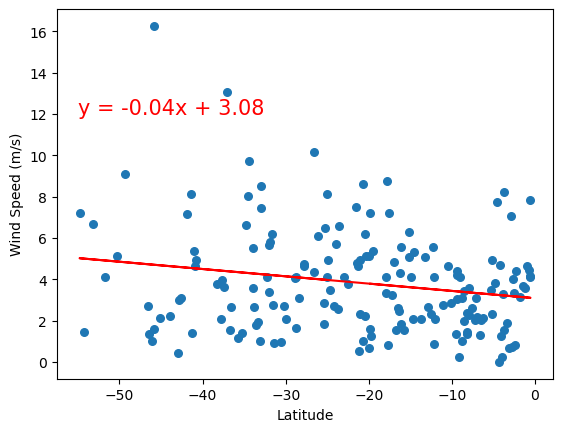

In [149]:
# Southern Hemisphere
weather_linregress_plot('Lat', 'Wind Speed', southern_hemi_df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE